# Analysis for CTCF and H3K9me3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import signal
from scipy.optimize import curve_fit
import scipy.stats
import itertools
import sklearn.metrics


Bad key "text.kerning_factor" on line 4 in
/Users/annie/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
out = 'path/to/out/dir'

## Decay from peak center

In [388]:
def decay_analysis(A, name, side):
    A = A
    if side == 'both':
        mA_75 = A[(A['prob'] >= 190)]
    if side == 'left':
        mA_75 = A[(A['prob'] >= 190) & (A['pos'] <= 0)]
    if side == 'right':
        mA_75 = A[(A['prob'] >= 190) & (A['pos'] >= 0)]
    mA_75['prob'] = 1
    A['presence'] = 1

    mA_75['pos'] = abs(mA_75['pos'])
    A['pos'] = abs(A['pos'])

    mA_75 = pd.pivot_table(mA_75, values = 'prob', columns = 'pos', index='read_name')
    A = pd.pivot_table(A, values = 'presence', columns='pos', index='read_name')

    mA_75_count = mA_75.sum(axis=0)
    A_count = A.sum(axis=0)

    mod_frac = mA_75_count / A_count

    calculate_resolution(mod_frac, name, .03, 0.008, 0.003)

In [389]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [390]:
def calculate_resolution(data, name, a, b, c):
    peaks = sp.signal.find_peaks(data, distance=140)
    p = peaks[0]
    diff_list = []
    for x, y in zip(p[0::], p[1::]):
        diff_list.append(y-x)
    print('peaks: ', str(p))
    print('peak differences: ', str(diff_list))
    subset_peaks = data.iloc[peaks[0]]
    popt, pcov = curve_fit(func, subset_peaks.index, subset_peaks.values, p0=[a, b, c])
    fig = plt.figure()
    sns.lineplot(data=data, color='#053C5E')
    plt.plot(data.index, func(data.index, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), color='#5E747F');
    plt.legend()
    plt.show()
    half_life = np.log((subset_peaks.values[0]/2 - popt[2])/popt[0])/-popt[1]
    decay_const = 1/popt[1]
    fig.savefig(out + '/' + name + '_exp_fit.png', dpi=300)
    print('half life:', half_life)
    print('decay constant:', decay_const)

/Users/annie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/annie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


peaks:  [ 44 237 410 600 773 948]
peak differences:  [193, 173, 190, 173, 175]


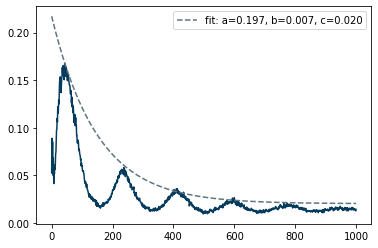

half life: 169.1062773196394
decay constant: 149.39152606569138


In [391]:
ctcf_mA = pd.read_csv('top_decile_mA.csv')
decay_analysis(ctcf_mA, 'CTCF_meg', 'both')

In [297]:
ctcf_mA.head()

,Unnamed: 0,id,read_name,chr,pos,prob,mod,presence
0,0,a43ee3d9-8286-4f66-8688-90d9aebe2ba9:997,a43ee3d9-8286-4f66-8688-90d9aebe2ba9,chr16,997,0,A+Y,1
1,1,a43ee3d9-8286-4f66-8688-90d9aebe2ba9:992,a43ee3d9-8286-4f66-8688-90d9aebe2ba9,chr16,992,0,A+Y,1
2,2,a43ee3d9-8286-4f66-8688-90d9aebe2ba9:987,a43ee3d9-8286-4f66-8688-90d9aebe2ba9,chr16,987,0,A+Y,1
3,3,a43ee3d9-8286-4f66-8688-90d9aebe2ba9:978,a43ee3d9-8286-4f66-8688-90d9aebe2ba9,chr16,978,0,A+Y,1
4,4,a43ee3d9-8286-4f66-8688-90d9aebe2ba9:977,a43ee3d9-8286-4f66-8688-90d9aebe2ba9,chr16,977,0,A+Y,1


In [298]:
A = ctcf_mA
mA_75 = A[(A['prob'] >= 190)]
mA_75['prob'] = 1
A['presence'] = 1

mA_75['pos'] = abs(mA_75['pos'])
A['pos'] = abs(A['pos'])

mA_75 = pd.pivot_table(mA_75, values = 'prob', columns = 'pos', index='read_name')
A = pd.pivot_table(A, values = 'presence', columns='pos', index='read_name')

mA_75_count = mA_75.sum(axis=0)
A_count = A.sum(axis=0)

mod_frac = mA_75_count / A_count

/Users/annie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/annie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/Users/annie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/annie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


peaks:  [ 44 230 410 600 773 948]
peak differences:  [186, 180, 190, 173, 175]


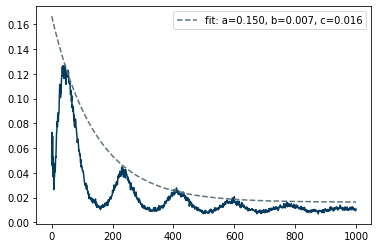

half life: 166.07052574710156
decay constant: 143.81033521838884


In [58]:
ctcf_mA = pd.read_csv('top_decile_mA.csv')
decay_analysis(ctcf_mA, 'CTCF_meg_L', 'left')

/Users/annie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/annie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


peaks:  [ 38 237 413 600 763 939]
peak differences:  [199, 176, 187, 163, 176]


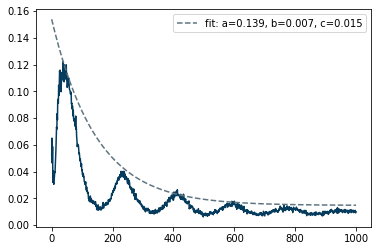

half life: 160.8144405964289
decay constant: 146.40110922075837


In [59]:
ctcf_mA = pd.read_csv('top_decile_mA.csv')
decay_analysis(ctcf_mA, 'CTCF_meg_R', 'right')

## Fraction of As methylated within +/- 150 bp of peak center in top decile

In [283]:
ctcf_mA = pd.read_csv('top_decile_mA.csv')

In [284]:
ctcf_mA.head()

,Unnamed: 0,id,read_name,chr,pos,prob,mod
0,0,a43ee3d9-8286-4f66-8688-90d9aebe2ba9:997,a43ee3d9-8286-4f66-8688-90d9aebe2ba9,chr16,997,0,A+Y
1,1,a43ee3d9-8286-4f66-8688-90d9aebe2ba9:992,a43ee3d9-8286-4f66-8688-90d9aebe2ba9,chr16,992,0,A+Y
2,2,a43ee3d9-8286-4f66-8688-90d9aebe2ba9:987,a43ee3d9-8286-4f66-8688-90d9aebe2ba9,chr16,987,0,A+Y
3,3,a43ee3d9-8286-4f66-8688-90d9aebe2ba9:978,a43ee3d9-8286-4f66-8688-90d9aebe2ba9,chr16,978,0,A+Y
4,4,a43ee3d9-8286-4f66-8688-90d9aebe2ba9:977,a43ee3d9-8286-4f66-8688-90d9aebe2ba9,chr16,977,0,A+Y


In [285]:
peak = ctcf_mA[abs(ctcf_mA['pos']) <= 150]

In [286]:
len(peak)

4727311

In [287]:
len(peak[peak['prob'] > 190])

351837

In [288]:
len(peak[peak['prob'] > 190])/len(peak)

0.07442645512427679

## Peak calling & sequencing saturation analysis

In [9]:
data_ctcf_depth = pd.read_csv("peaks_seq_saturation.csv")

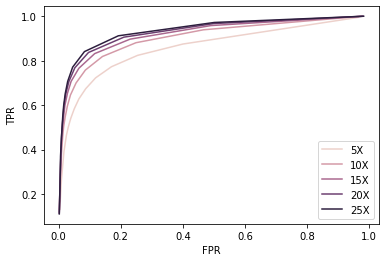

In [16]:
sns.lineplot(data=data_ctcf_depth, x='FPR', y='TPR', hue='coverage');
plt.legend(['5X', '10X', '15X', '20X', '25X']);
plt.savefig(out + '/seq_depth_roc.pdf')

In [12]:
auc_list = []
for coverage in data_ctcf_depth['coverage'].unique():
    sub = data_ctcf_depth[data_ctcf_depth['coverage'] == coverage]
    auc = sklearn.metrics.auc(sub['FPR'], sub['TPR'])
    auc_list.append(auc)
auc_list

[0.8234514999999999,
 0.878632,
 0.8985585000000001,
 0.9092390000000001,
 0.9177710000000001]

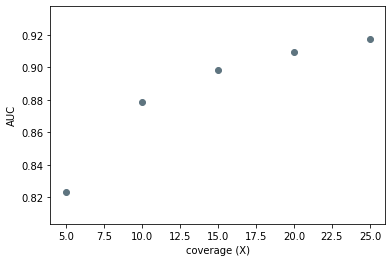

In [17]:
depth = [5, 10, 15, 20, 25]
plt.scatter(depth, auc_list, color = '#5E747F');
plt.ylabel('AUC')
plt.xlabel('coverage (X)')
plt.savefig(out + '/seq_depth_auc.pdf')

### N vs. C terminus targeting

In [38]:
# fisher's exact test
from scipy.stats import fisher_exact

In [32]:
aggregate_C = pd.read_csv('aggregate_counts_C.csv')
aggregate_N = pd.read_csv('aggregate_counts_N.csv')

In [33]:
aggregate_C["frac"] = (aggregate_C["methylated_bases"] / aggregate_C["total_bases"])
aggregate_N["frac"] = (aggregate_N["methylated_bases"] / aggregate_N["total_bases"])

In [34]:
# show with 100 bp and with 300 bp
aggregate_C_me_total = sum(aggregate_C[abs(aggregate_C['pos']) <= 300].methylated_bases)
aggregate_N_me_total = sum(aggregate_N[abs(aggregate_N['pos']) <= 300].methylated_bases)

# compare C vs. N
aggregate_C_left = aggregate_C[(aggregate_C['pos'] > -300) & (aggregate_C['pos'] < 0)]
aggregate_C_left_mA = sum(aggregate_C_left.methylated_bases)
aggregate_C_total_mA = sum(aggregate_C.methylated_bases)

aggregate_N_left = aggregate_N[(aggregate_N['pos'] > -300) & (aggregate_N['pos'] < 0)]
aggregate_N_left_mA = sum(aggregate_N_left.methylated_bases)
aggregate_N_total_mA = sum(aggregate_N.methylated_bases)

In [35]:
table = np.array([[aggregate_C_left_mA, aggregate_C_me_total-aggregate_C_left_mA],
                  [aggregate_N_left_mA, aggregate_N_me_total-aggregate_N_left_mA]])
oddsratio, pvalue = fisher_exact(table, alternative='greater')
pvalue

5.925825046964597e-08

In [36]:
# show with 100 bp
aggregate_C_me_total = sum(aggregate_C[abs(aggregate_C['pos']) <= 100].methylated_bases)
aggregate_N_me_total = sum(aggregate_N[abs(aggregate_N['pos']) <= 100].methylated_bases)

# compare C vs. N
aggregate_C_left = aggregate_C[(aggregate_C['pos'] > -100) & (aggregate_C['pos'] < 0)]
aggregate_C_left_mA = sum(aggregate_C_left.methylated_bases)
aggregate_C_total_mA = sum(aggregate_C.methylated_bases)

aggregate_N_left = aggregate_N[(aggregate_N['pos'] > -100) & (aggregate_N['pos'] < 0)]
aggregate_N_left_mA = sum(aggregate_N_left.methylated_bases)
aggregate_N_total_mA = sum(aggregate_N.methylated_bases)

In [37]:
table = np.array([[aggregate_C_left_mA, aggregate_C_me_total-aggregate_C_left_mA],
                  [aggregate_N_left_mA, aggregate_N_me_total-aggregate_N_left_mA]])
oddsratio, pvalue = fisher_exact(table, alternative='greater')
pvalue

0.00010100195433750487

### CTCF Nanopore vs. PacBio comparison

In [79]:
# nanopore data
ctcf_nano = pd.read_csv("ctcf_nano_top_decile.csv")
untreated_nano = pd.read_csv("untreated_nano_top_decile.csv")

In [80]:
# pacbio data
ctcf_pb = pd.read_csv("CTCF_pb_top_decile.csv")
untreated_pb = pd.read_csv("untreated_pb_top_decile.csv")

In [81]:
ctcf_pb_100 = ctcf_pb[abs(ctcf_pb['pos']) <= 100]
untreated_pb_100 = untreated_pb[abs(untreated_pb['pos']) <= 100]
ctcf_n_100 = ctcf_nano[abs(ctcf_nano['pos']) <= 100]
untreated_n_100 = untreated_nano[abs(untreated_nano['pos']) <= 100]

In [82]:
colors = ["#2D1E2F", "#A9E5BB", "#610345", "#559CAD", "#5E747F"]

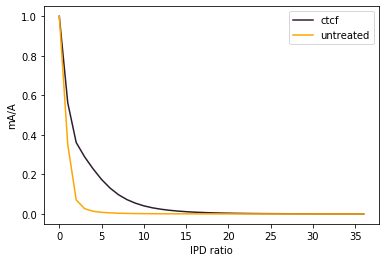

In [83]:
plt.figure()
i=0
nps = [1]
iprs = [*range(0, 37, 1)]
for np in nps:
    ctcf_mA = []
    untreated_mA = []
    for ipr in iprs:
        ctcf_subset = ctcf_pb_100[ctcf_pb_100['np'] >= np]
        untreated_subset = untreated_pb_100[untreated_pb_100['np'] >= np]
        ctcf_mA.append(ctcf_subset[ctcf_subset['ipr'] >= ipr].shape[0] / ctcf_pb_100.shape[0])
        untreated_mA.append(untreated_subset[untreated_subset['ipr'] >= ipr].shape[0] / untreated_pb_100.shape[0])
    ratio = [i/j if j> 0 else 0 for i, j in zip(ctcf_mA, untreated_mA)]
    sns.lineplot(x=iprs, y=ctcf_mA, label='ctcf', color='#2D1E2F')
    sns.lineplot(x=iprs, y=untreated_mA, label='untreated', color='orange')
    #sns.lineplot(x=iprs[0:25], y=ctcf_mA, linestyle="dashed") # have on split axis?
    plt.ylabel('mA/A')
    plt.xlabel('IPD ratio');
    i=i+1
plt.savefig(out + '/pb_ctcf_untreated_thresh.pdf')

In [84]:
import numpy as np
iprs = np.arange(0, 10.5, 0.5).tolist()
nps = [*range(1, 6, 1)]
#iprs = [*range(0, 10, 1)] #37
#nps = [*range(0, 32, 2)]
threshs = [*range(0, 256, 1)]

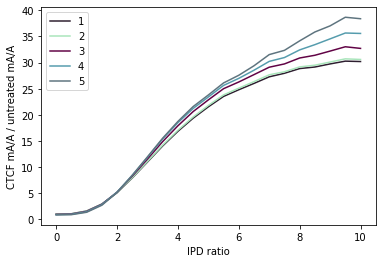

In [85]:
# pacbio CTCF mA/A / untreated mA/A vs IPD ratio
plt.figure()
i=0
for np in nps:
    ctcf_mA = []
    untreated_mA = []
    for ipr in iprs:
        ctcf_subset = ctcf_pb_100[ctcf_pb_100['np'] >= np]
        untreated_subset = untreated_pb_100[untreated_pb_100['np'] >= np]
        ctcf_mA.append(ctcf_subset[ctcf_subset['ipr'] >= ipr].shape[0] / ctcf_pb_100.shape[0])
        untreated_mA.append(untreated_subset[untreated_subset['ipr'] >= ipr].shape[0] / untreated_pb_100.shape[0])
    ratio = [i/j if j> 0 else 0 for i, j in zip(ctcf_mA, untreated_mA)]
    sns.lineplot(x=iprs, y=ratio, label=np, color=colors[i])
    #sns.lineplot(x=iprs[0:25], y=ctcf_mA, linestyle="dashed") # have on split axis?
    plt.ylabel('CTCF mA/A / untreated mA/A')
    plt.xlabel('IPD ratio');
    i=i+1
plt.savefig(out + '/pb_enrichment_ipr.pdf')

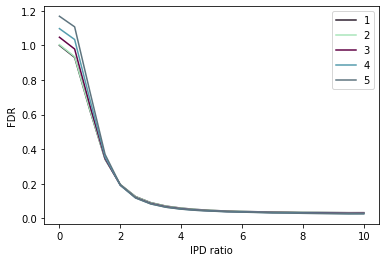

In [86]:
# pacbio FDR: (untreated mA/A / CTCF mA/A) vs. IPD ratio
plt.figure()
i=0
for np in nps:
    ctcf_mA = []
    untreated_mA = []
    for ipr in iprs:
        ctcf_subset = ctcf_pb_100[ctcf_pb_100['np'] >= np]
        untreated_subset = untreated_pb_100[untreated_pb_100['np'] >= np]
        ctcf_mA.append(ctcf_subset[ctcf_subset['ipr'] >= ipr].shape[0] / ctcf_pb_100.shape[0])
        untreated_mA.append(untreated_subset[untreated_subset['ipr'] >= ipr].shape[0] / untreated_pb_100.shape[0])
    fdr = [j/i if i> 0 else 0 for i, j in zip(ctcf_mA, untreated_mA)]
    sns.lineplot(x=iprs, y=fdr, label=np, color=colors[i])
    plt.ylabel('FDR')
    plt.xlabel('IPD ratio');
    i=i+1
plt.savefig(out + '/pb_fdr_ipr.pdf')

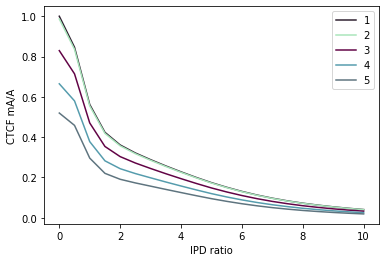

In [87]:
plt.figure()
i=0
for np in nps:
    ctcf_mA = []
    untreated_mA = []
    for ipr in iprs:
        ctcf_subset = ctcf_pb_100[ctcf_pb_100['np'] >= np]
        untreated_subset = untreated_pb_100[untreated_pb_100['np'] >= np]
        ctcf_mA.append(ctcf_subset[ctcf_subset['ipr'] >= ipr].shape[0] / ctcf_pb_100.shape[0]) #denominator
        untreated_mA.append(untreated_subset[untreated_subset['ipr'] >= ipr].shape[0] / untreated_pb_100.shape[0]) #denominator
    sns.lineplot(x=iprs, y=ctcf_mA, label=np, color=colors[i])
    plt.ylabel('CTCF mA/A')
    plt.xlabel('IPD ratio');
    i=i+1
plt.savefig(out + '/pb_mA_A_ipr.pdf')

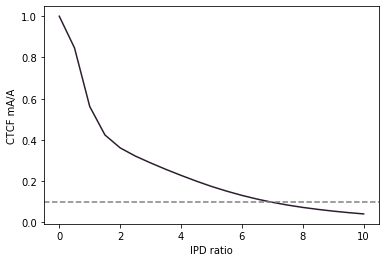

In [88]:
plt.figure()
i=0
np=1
ctcf_mA = []
untreated_mA = []
for ipr in iprs:
    ctcf_subset = ctcf_pb_100[ctcf_pb_100['np'] >= np]
    untreated_subset = untreated_pb_100[untreated_pb_100['np'] >= np]
    ctcf_mA.append(ctcf_subset[ctcf_subset['ipr'] >= ipr].shape[0] / ctcf_pb_100.shape[0]) #denominator
    untreated_mA.append(untreated_subset[untreated_subset['ipr'] >= ipr].shape[0] / untreated_pb_100.shape[0]) #denominator
sns.lineplot(x=iprs, y=ctcf_mA, color=colors[i])
plt.ylabel('CTCF mA/A')
plt.xlabel('IPD ratio');
i=i+1
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.savefig(out + '/pb_mA_A_ipr_np1.pdf')

In [89]:
ctcf_mA[13]

0.11279242460948609

In [90]:
iprs[13]

6.5

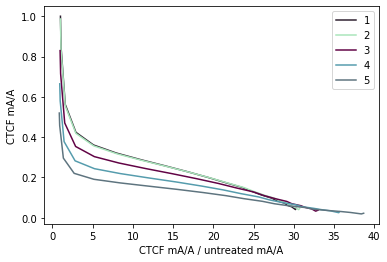

In [91]:
plt.figure()
i=0
for np in nps:
    ctcf_mA = []
    untreated_mA = []
    for ipr in iprs:
        ctcf_subset = ctcf_pb_100[ctcf_pb_100['np'] >= np]
        untreated_subset = untreated_pb_100[untreated_pb_100['np'] >= np]
        ctcf_mA.append(ctcf_subset[ctcf_subset['ipr'] >= ipr].shape[0] / ctcf_pb_100.shape[0]) #denominator
        untreated_mA.append(untreated_subset[untreated_subset['ipr'] >= ipr].shape[0] / untreated_pb_100.shape[0]) #denominator
    ratio = [i/j if j> 0 else 0 for i, j in zip(ctcf_mA, untreated_mA)]
    sns.lineplot(x=ratio, y=ctcf_mA, label=np, color=colors[i])
    plt.xlabel('CTCF mA/A / untreated mA/A')
    plt.ylabel('CTCF mA/A');
    i=i+1
plt.savefig(out + '/pb_enrichment_mA_A_ipr.pdf')

#### Nanopore

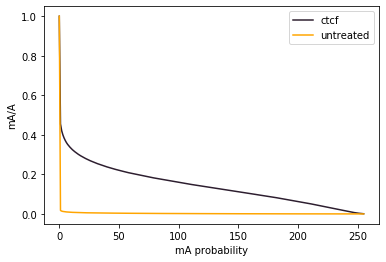

In [92]:
# nanopore CTCF mA/A / untreated mA/A vs. threshold
ctcf_mA_nano = []
untreated_mA_nano = []
for thresh in threshs:
    ctcf_mA_nano.append(ctcf_n_100[ctcf_n_100['prob'] >= thresh].shape[0] / ctcf_n_100.shape[0])
    untreated_mA_nano.append(untreated_n_100[untreated_n_100['prob'] >= thresh].shape[0] / untreated_n_100.shape[0])
sns.lineplot(x=threshs, y=ctcf_mA_nano, label='ctcf', color="#2D1E2F")
sns.lineplot(x=threshs, y=untreated_mA_nano, label='untreated', color='orange')
plt.ylabel('mA/A')
plt.xlabel('mA probability');
plt.savefig(out + '/nano_ctcf_untreated_thresh.pdf')

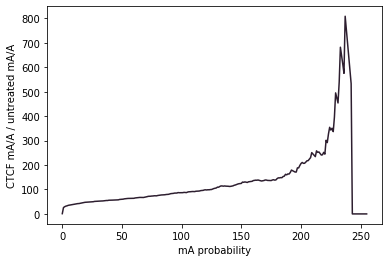

In [93]:
# nanopore CTCF mA/A / untreated mA/A vs. threshold
ctcf_mA_nano = []
untreated_mA_nano = []
for thresh in threshs:
    ctcf_mA_nano.append(ctcf_n_100[ctcf_n_100['prob'] >= thresh].shape[0] / ctcf_n_100.shape[0])
    untreated_mA_nano.append(untreated_n_100[untreated_n_100['prob'] >= thresh].shape[0] / untreated_n_100.shape[0])
    ratio_nano = [i/j if j> 0 else 0 for i, j in zip(ctcf_mA_nano, untreated_mA_nano)]
sns.lineplot(x=threshs, y=ratio_nano, color='#2D1E2F')
plt.ylabel('CTCF mA/A / untreated mA/A')
plt.xlabel('mA probability');
plt.savefig(out + '/nano_enrichment_thresh.pdf')

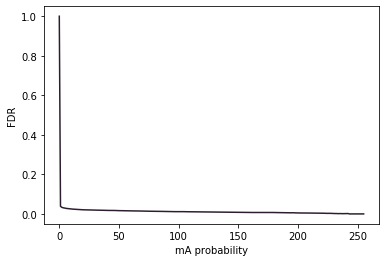

In [94]:
# nanopore CTCF mA/A / untreated mA/A vs. threshold
ctcf_mA_nano = []
untreated_mA_nano = []
for thresh in threshs:
    ctcf_mA_nano.append(ctcf_n_100[ctcf_n_100['prob'] >= thresh].shape[0] / ctcf_n_100.shape[0])
    untreated_mA_nano.append(untreated_n_100[untreated_n_100['prob'] >= thresh].shape[0] / untreated_n_100.shape[0])
    fdr_nano = [j/i if i> 0 else 0 for i, j in zip(ctcf_mA_nano, untreated_mA_nano)]
sns.lineplot(x=threshs, y=fdr_nano, color='#2D1E2F')
plt.ylabel('FDR')
plt.xlabel('mA probability');
plt.savefig(out + '/nano_fdr_thresh.pdf')

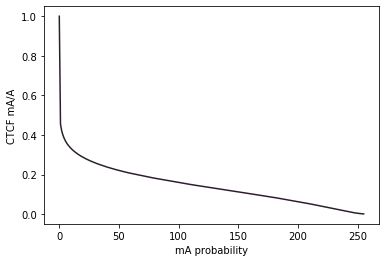

In [95]:
# nanopore CTCF mA/A vs. threshold
ctcf_mA_nano = []
untreated_mA_nano = []
for thresh in threshs:
    ctcf_mA_nano.append(ctcf_n_100[ctcf_n_100['prob'] >= thresh].shape[0] / ctcf_n_100.shape[0])
    untreated_mA_nano.append(untreated_n_100[untreated_n_100['prob'] >= thresh].shape[0] / untreated_n_100.shape[0])
    #ratio_nano = [i/j if j> 0 else 0 for i, j in zip(ctcf_mA_nano, untreated_mA_nano)]
sns.lineplot(x=threshs, y=ctcf_mA_nano, color='#2D1E2F')
plt.ylabel('CTCF mA/A')
plt.xlabel('mA probability');
plt.savefig(out + '/nano_mA_A_thresh.pdf')

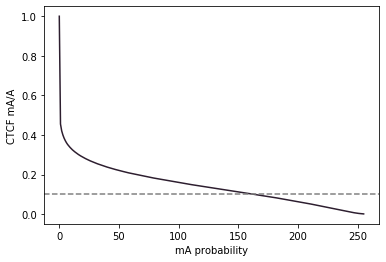

In [96]:
# nanopore CTCF mA/A vs. threshold
ctcf_mA_nano = []
untreated_mA_nano = []
for thresh in threshs:
    ctcf_mA_nano.append(ctcf_n_100[ctcf_n_100['prob'] >= thresh].shape[0] / ctcf_n_100.shape[0])
    untreated_mA_nano.append(untreated_n_100[untreated_n_100['prob'] >= thresh].shape[0] / untreated_n_100.shape[0])
    #ratio_nano = [i/j if j> 0 else 0 for i, j in zip(ctcf_mA_nano, untreated_mA_nano)]
sns.lineplot(x=threshs, y=ctcf_mA_nano, color='#2D1E2F')
plt.ylabel('CTCF mA/A')
plt.xlabel('mA probability');
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.savefig(out + '/nano_mA_A_thresh_dotted.pdf')

In [100]:
ctcf_mA_nano[150]

0.11244345073431992

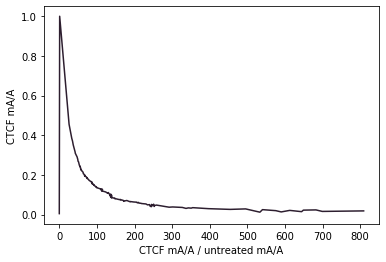

In [101]:
# nanopore CTCF mA/A vs. threshold
ctcf_mA_nano = []
untreated_mA_nano = []
for thresh in threshs:
    ctcf_mA_nano.append(ctcf_n_100[ctcf_n_100['prob'] >= thresh].shape[0] / ctcf_n_100.shape[0])
    untreated_mA_nano.append(untreated_n_100[untreated_n_100['prob'] >= thresh].shape[0] / untreated_n_100.shape[0])
    ratio_nano = [i/j if j> 0 else 0 for i, j in zip(ctcf_mA_nano, untreated_mA_nano)]
sns.lineplot(x=ratio_nano, y=ctcf_mA_nano, color='#2D1E2F')
plt.ylabel('CTCF mA/A')
plt.xlabel('CTCF mA/A / untreated mA/A');
plt.savefig(out + '/nano_mA_A_ratio.pdf')

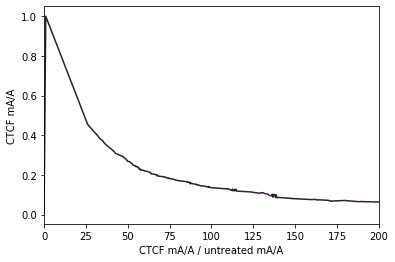

In [102]:
# nanopore CTCF mA/A vs. threshold
ctcf_mA_nano = []
untreated_mA_nano = []
for thresh in threshs:
    ctcf_mA_nano.append(ctcf_n_100[ctcf_n_100['prob'] >= thresh].shape[0] / ctcf_n_100.shape[0])
    untreated_mA_nano.append(untreated_n_100[untreated_n_100['prob'] >= thresh].shape[0] / untreated_n_100.shape[0])
    ratio_nano = [i/j if j> 0 else 0 for i, j in zip(ctcf_mA_nano, untreated_mA_nano)]
sns.lineplot(x=ratio_nano, y=ctcf_mA_nano, color='#2D1E2F')
plt.ylabel('CTCF mA/A')
plt.xlabel('CTCF mA/A / untreated mA/A');
plt.xlim(0,200)
plt.savefig(out + '/nano_mA_A_ratio_zoom.pdf')

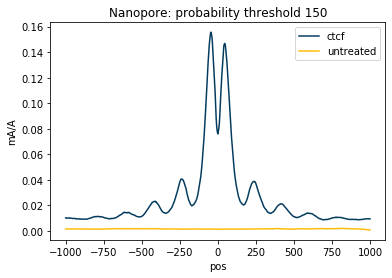

In [103]:
# overlay
all_data_mA = ctcf_nano
all_data_mA_t = ctcf_nano[ctcf_nano['prob'] >= 150]
all_A = all_data_mA.groupby("pos").size().reset_index(name='counts')
all_mA = all_data_mA_t.groupby("pos").size().reset_index(name='counts')
smooth = 50
min_periods = 10
all_data_mA_rolling_nano = all_mA.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_A_rolling_nano = all_A.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_mA_rolling_nano["frac"] = all_data_mA_rolling_nano["counts"]/all_data_A_rolling_nano["counts"]

all_data_mA = untreated_nano
all_data_mA_t = untreated_nano[untreated_nano['prob'] >= 150] 
all_A = all_data_mA.groupby("pos").size().reset_index(name='counts')
all_mA = all_data_mA_t.groupby("pos").size().reset_index(name='counts')
all_data_mA_rolling_untreated_nano = all_mA.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_A_rolling_untreated_nano = all_A.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_mA_rolling_untreated_nano["frac"] = all_data_mA_rolling_untreated_nano["counts"]/all_data_A_rolling_untreated_nano["counts"]

fig = plt.figure()
sns.lineplot(x=all_data_mA_rolling_nano["pos"], y=all_data_mA_rolling_nano["frac"], label='ctcf', color='#053C5E')
sns.lineplot(x=all_data_mA_rolling_untreated_nano["pos"], y=all_data_mA_rolling_untreated_nano["frac"], label='untreated', color='#FFBC0A')
plt.ylabel('mA/A')
plt.title('Nanopore: probability threshold 150')
plt.show()

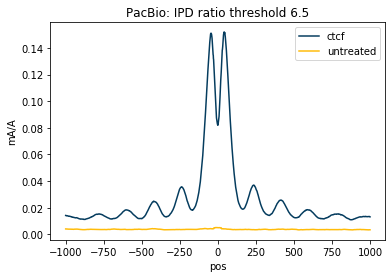

In [104]:
# overlay
all_data_mA = ctcf_pb
all_data_mA_t = ctcf_pb[ctcf_pb['ipr'] >= 6.5]
all_A = all_data_mA.groupby("pos").size().reset_index(name='counts')
all_mA = all_data_mA_t.groupby("pos").size().reset_index(name='counts')
smooth = 50
min_periods = 10
all_data_mA_rolling = all_mA.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_A_rolling = all_A.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_mA_rolling["frac"] = all_data_mA_rolling["counts"]/all_data_A_rolling["counts"]

all_data_mA = untreated_pb
all_data_mA_t = untreated_pb[untreated_pb['ipr'] >= 6.5]
all_A = all_data_mA.groupby("pos").size().reset_index(name='counts')
all_mA = all_data_mA_t.groupby("pos").size().reset_index(name='counts')
all_data_mA_rolling_untreated = all_mA.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_A_rolling_untreated = all_A.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_mA_rolling_untreated["frac"] = all_data_mA_rolling_untreated["counts"]/all_data_A_rolling_untreated["counts"]

fig = plt.figure()
sns.lineplot(x=all_data_mA_rolling["pos"], y=all_data_mA_rolling["frac"], label='ctcf', color='#053C5E')
sns.lineplot(x=all_data_mA_rolling_untreated["pos"], y=all_data_mA_rolling_untreated["frac"], label='untreated', color='#FFBC0A')
plt.ylabel('mA/A')
plt.title('PacBio: IPD ratio threshold 6.5')
plt.show()

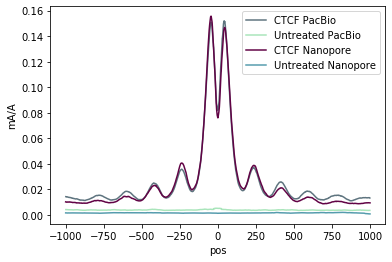

In [105]:
# show pacbio and nanopore on the same plot
colors = ["#2D1E2F", "#A9E5BB", "#610345", "#559CAD", "#5E747F"]
fig = plt.figure()
sns.lineplot(x=all_data_mA_rolling["pos"], y=all_data_mA_rolling["frac"], label='CTCF PacBio', color=colors[4])
sns.lineplot(x=all_data_mA_rolling_untreated["pos"], y=all_data_mA_rolling_untreated["frac"], label='Untreated PacBio', color=colors[1])
sns.lineplot(x=all_data_mA_rolling_nano["pos"], y=all_data_mA_rolling_nano["frac"], label='CTCF Nanopore', color=colors[2])
sns.lineplot(x=all_data_mA_rolling_untreated_nano["pos"], y=all_data_mA_rolling_untreated_nano["frac"], label='Untreated Nanopore', color=colors[3])
plt.ylabel('mA/A')
plt.savefig(out + '/nano_pb_motif_enrich.pdf')

## CTCF sensitivity (Nanopore)

In [107]:
ctcf = pd.read_csv('top_decile_mA.csv')
igg = pd.read_csv('igg_top_decile_mA.csv')

In [181]:
def calc_frac_peak(data):
    data_peak = data[(data['pos'] >= -40) & (data['pos'] <= 40)] #150
    data_peak_t75 = data_peak[data_peak['prob'] >= 190]
    return len(data_peak['read_name'].unique()), len(data_peak_t75['read_name'].unique())

In [182]:
r, pr = calc_frac_peak(ctcf)
pr/r

0.5736227637945577

In [183]:
r_igg, pr_igg = calc_frac_peak(igg)
pr_igg/r_igg

0.00989666715179741

In [184]:
# FDR
(pr_igg/r_igg)/(pr/r)

0.017252919124635523

In [185]:
def calc_frac_not_peak(data):
    data_peak = data[(data['pos'] <= -960) | (data['pos'] >= 960)] #850
    print(data_peak['read_name'].unique())
    data_peak_t75 = data_peak[data_peak['prob'] >= 190]
    return len(data_peak['read_name'].unique()), len(data_peak_t75['read_name'].unique())

In [186]:
r_nopeak, pr_nopeak = calc_frac_not_peak(ctcf)
pr_nopeak/r_nopeak

['a43ee3d9-8286-4f66-8688-90d9aebe2ba9'
 '124068f6-0fb2-4389-af4c-38ed1aa69986'
 '555bd733-3866-466d-89d9-3a5045a2c3bf' ...
 '7a926d46-cc53-43a4-abb6-5f9bcc9f9fbe'
 '0dbdc607-6ab5-4717-9162-f8d5fefbba60'
 '0745924f-68af-4747-8fdc-18e9b1be9202']


0.1339177886120678

In [187]:
# FPR = FP / (TP + TN)
pr_nopeak / (pr + (r_nopeak - pr_nopeak))

0.09273656496825151

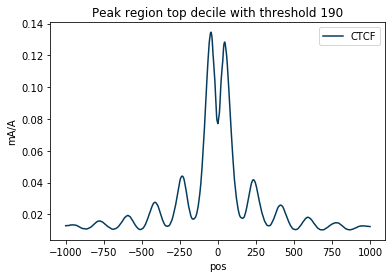

In [136]:
# overlay
all_data_mA = ctcf
all_data_mA_t = ctcf[ctcf['prob'] >= 190]
all_A = all_data_mA.groupby("pos").size().reset_index(name='counts')
all_mA = all_data_mA_t.groupby("pos").size().reset_index(name='counts')
smooth = 50
min_periods = 10
all_data_mA_rolling_nano = all_mA.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_A_rolling_nano = all_A.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_mA_rolling_nano["frac"] = all_data_mA_rolling_nano["counts"]/all_data_A_rolling_nano["counts"]

all_data_mA = igg
all_data_mA_t = igg[igg['prob'] >= 190] 
all_A = all_data_mA.groupby("pos").size().reset_index(name='counts')
all_mA = all_data_mA_t.groupby("pos").size().reset_index(name='counts')
all_data_mA_rolling_untreated_nano = all_mA.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_A_rolling_untreated_nano = all_A.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_mA_rolling_untreated_nano["frac"] = all_data_mA_rolling_untreated_nano["counts"]/all_data_A_rolling_untreated_nano["counts"]

fig = plt.figure()
sns.lineplot(x=all_data_mA_rolling_nano["pos"], y=all_data_mA_rolling_nano["frac"], label='CTCF', color='#053C5E')
#sns.lineplot(x=all_data_mA_rolling_untreated_nano["pos"], y=all_data_mA_rolling_untreated_nano["frac"], label='IgG', color='#FFBC0A')
plt.ylabel('mA/A')
plt.title('Peak region top decile with threshold 190')
plt.show()

In [125]:
min(all_data_mA_rolling_nano['frac'])

0.010201417756089725

In [126]:
max(all_data_mA_rolling_nano['frac'])

0.134587922820613

In [129]:
.01/.13459

0.07429972509101718

In [3]:
ctcf_2kb = pd.read_csv('top_decile_mA_2kb.csv')

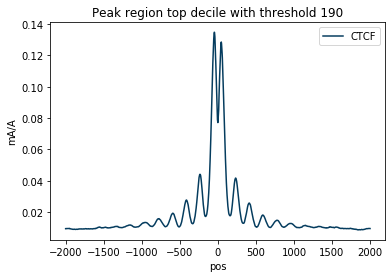

In [6]:
# overlay
all_data_mA = ctcf_2kb
all_data_mA_t = ctcf_2kb[ctcf_2kb['prob'] >= 190]
all_A = all_data_mA.groupby("pos").size().reset_index(name='counts')
all_mA = all_data_mA_t.groupby("pos").size().reset_index(name='counts')
smooth = 50
min_periods = 10
all_data_mA_rolling_nano = all_mA.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_A_rolling_nano = all_A.rolling(window=smooth, min_periods=min_periods, center=True, on="pos").sum()
all_data_mA_rolling_nano["frac"] = all_data_mA_rolling_nano["counts"]/all_data_A_rolling_nano["counts"]

fig = plt.figure()
sns.lineplot(x=all_data_mA_rolling_nano["pos"], y=all_data_mA_rolling_nano["frac"], label='CTCF', color='#053C5E')
plt.ylabel('mA/A')
plt.title('Peak region top decile with threshold 190')
# plt.show()
plt.savefig(out + '/2kb_enrich.png', dpi=600)

In [266]:
# set threshold on # mA in 300 bp at threshold 190 to determine sensitivity
def calc_frac_peak(data, num):
    data_peak = data[(data['pos'] >= -150) & (data['pos'] <= 150)] #150
    data_peak_t75 = data_peak[data_peak['prob'] >= 190]
    cnt = data_peak_t75['read_name'].value_counts()
    pos = len(cnt.values[cnt.values >= num])
    return len(data_peak['read_name'].unique()), pos

In [267]:
def calc_frac_not_peak(data, num):
    data_peak = data[(data['pos'] <= -1850) | (data['pos'] >= 1850)] #850
    data_peak_t75 = data_peak[data_peak['prob'] >= 190]
    cnt = data_peak_t75['read_name'].value_counts()
    pos = len(cnt.values[cnt.values >= num])
    return len(data_peak['read_name'].unique()), pos

In [268]:
r_peak, p_peak = calc_frac_peak(ctcf_2kb, 2)
p_peak/r_peak

0.767012917831935

In [269]:
r_nopeak, p_nopeak = calc_frac_not_peak(ctcf_2kb, 2)
p_nopeak/r_nopeak

0.19327597557376677

In [270]:
## FPR = FP / (FP + TN)
fpr = p_nopeak / (p_nopeak + (r_nopeak - p_nopeak))
fpr

0.19327597557376677

In [335]:
fprs = []
tprs = []
sensitivity = []
for i in range(0, 20):
    r_peak, p_peak = calc_frac_peak(ctcf_2kb, i)
    r_nopeak, p_nopeak = calc_frac_not_peak(ctcf_2kb, i)
    # FPR = FP / (FP + TN)
    fpr = p_nopeak / (p_nopeak + (r_nopeak - p_nopeak))
    # TPR = TP / (TP + FN)
    tpr = p_peak / (p_peak + (r_peak - p_peak))
    fprs.append(fpr)
    tprs.append(tpr)
    s = p_peak/r_peak
    sensitivity.append(s)

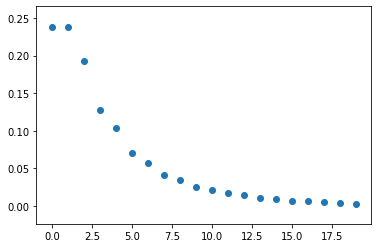

In [336]:
plt.scatter(range(0,20), fprs)

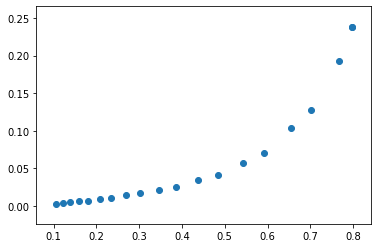

In [337]:
plt.scatter(sensitivity, fprs)

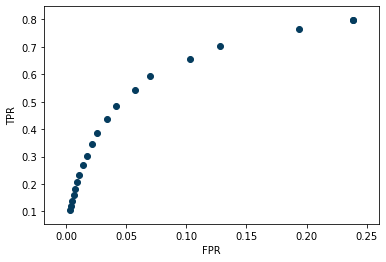

In [338]:
plt.scatter(fprs, tprs, color='#053C5E')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.savefig(out + '/roc_ctcf_sensitivity.pdf')

In [339]:
tprs[6]

0.5427043103830959

In [340]:
fprs[6]

0.0571156159905564

In [341]:
sensitivity[6]

0.5427043103830959

In [342]:
x = range(0, 10)

In [343]:
x[6]

6